# Import Dependencies and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu
df = pd.read_csv('job_data_clean.csv')

# Kiểm tra thông tin cơ bản
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STT                  400 non-null    int64  
 1   STT.1                400 non-null    int64  
 2   Trang thu thập       400 non-null    object 
 3   Tên công ty          400 non-null    object 
 4   Tên công việc        400 non-null    object 
 5   Vị trí ứng tuyển     400 non-null    object 
 6   Yêu cầu bằng cấp     400 non-null    object 
 7   Yêu cầu kinh nghiệm  400 non-null    object 
 8   Địa điểm             400 non-null    object 
 9   Ngày đăng tuyển      400 non-null    object 
 10  Lương tối thiểu      400 non-null    float64
 11  Lương tối đa         400 non-null    float64
 12  Lương TB             400 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 40.8+ KB
None
   STT  STT.1 Trang thu thập                               Tên công ty  \
0  

# Data Preprocessing


In [5]:
# Loại bỏ các cột không cần thiết
job_data_cleaned = df.drop(columns=['STT', 'STT.1'])

# Chuyển đổi cột 'Ngày đăng tuyển' thành định dạng datetime
job_data_cleaned['Ngày đăng tuyển'] = pd.to_datetime(job_data_cleaned['Ngày đăng tuyển'], errors='coerce')

# Kiểm tra giá trị thiếu trong dữ liệu
missing_values = job_data_cleaned.isnull().sum()

job_data_cleaned.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Trang thu thập       400 non-null    object        
 1   Tên công ty          400 non-null    object        
 2   Tên công việc        400 non-null    object        
 3   Vị trí ứng tuyển     400 non-null    object        
 4   Yêu cầu bằng cấp     400 non-null    object        
 5   Yêu cầu kinh nghiệm  400 non-null    object        
 6   Địa điểm             400 non-null    object        
 7   Ngày đăng tuyển      400 non-null    datetime64[ns]
 8   Lương tối thiểu      400 non-null    float64       
 9   Lương tối đa         400 non-null    float64       
 10  Lương TB             400 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 34.5+ KB


(None,
 Trang thu thập         0
 Tên công ty            0
 Tên công việc          0
 Vị trí ứng tuyển       0
 Yêu cầu bằng cấp       0
 Yêu cầu kinh nghiệm    0
 Địa điểm               0
 Ngày đăng tuyển        0
 Lương tối thiểu        0
 Lương tối đa           0
 Lương TB               0
 dtype: int64)

# Correlation Analysis

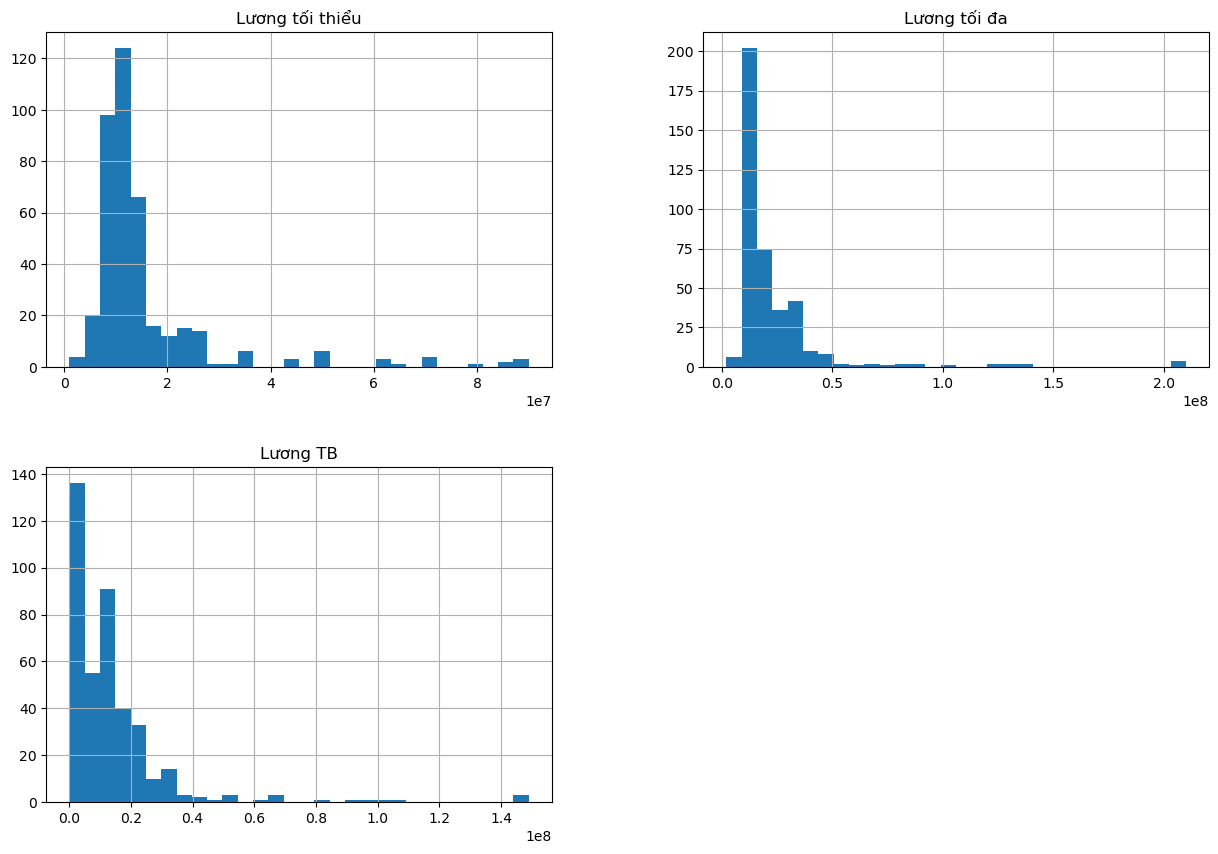

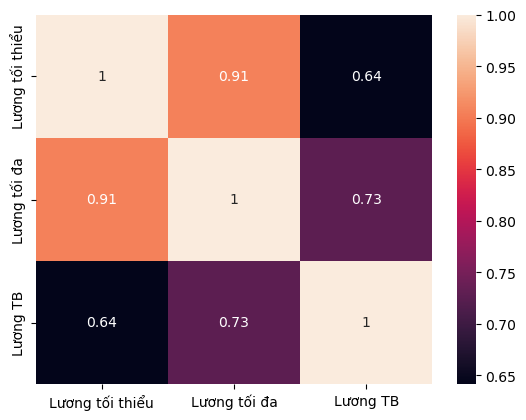

In [6]:
# Phân phối của các cột số
df[['Lương tối thiểu', 'Lương tối đa', 'Lương TB']].hist(bins=30, figsize=(15, 10))
plt.show()

# Tương quan giữa các cột số
sns.heatmap(df[['Lương tối thiểu', 'Lương tối đa', 'Lương TB']].corr(), annot=True)
plt.show()

In [9]:
# Tính toán ma trận tương quan
corr_matrix = df[['Yêu cầu bằng cấp', 'Yêu cầu kinh nghiệm', 'Vị trí ứng tuyển', 'Lương tối thiểu', 'Lương tối đa', 'Lương TB']].corr()


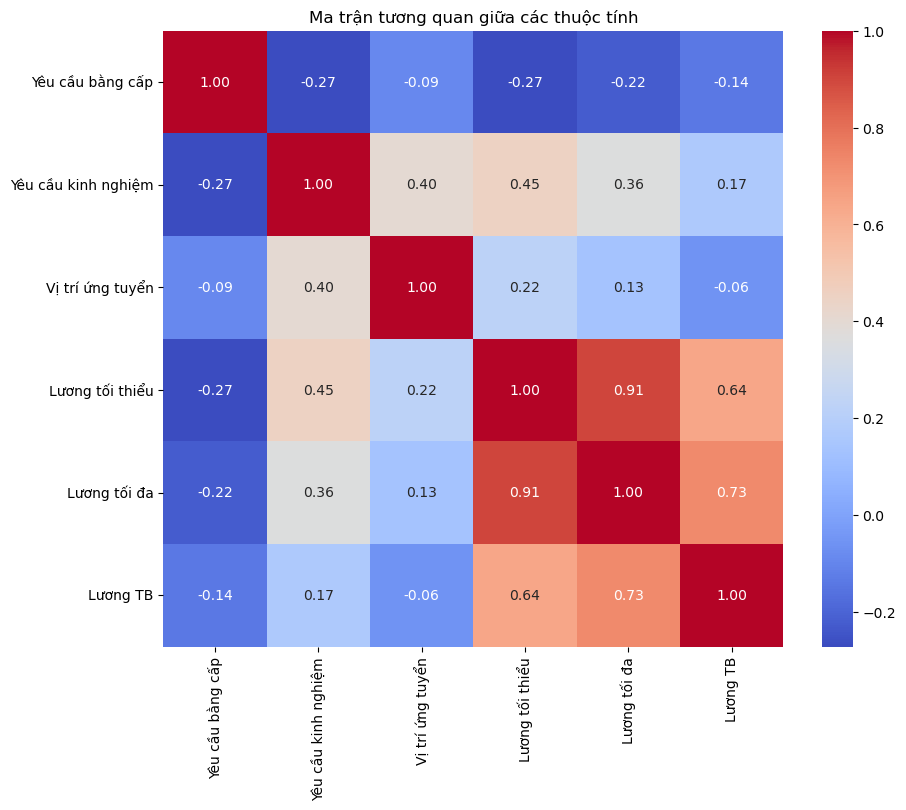

In [10]:
# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

### Phân tích từ heatmap:

Yêu cầu bằng cấp và Lương TB: Nếu hệ số tương quan dương và cao, điều này cho thấy bằng cấp cao hơn có xu hướng liên quan đến mức lương cao hơn.

Yêu cầu kinh nghiệm và Lương TB: Nếu hệ số tương quan dương và cao, điều này cho thấy kinh nghiệm nhiều hơn có xu hướng liên quan đến mức lương cao hơn.

Vị trí ứng tuyển và Lương TB: Nếu hệ số tương quan dương, điều này cho thấy một số vị trí có xu hướng được trả lương cao hơn.

### Kết luận
Bằng cấp: Nếu hệ số tương quan dương và cao, điều này cho thấy bằng cấp cao hơn có xu hướng liên quan đến mức lương cao hơn.

Kinh nghiệm: Nếu hệ số tương quan dương và cao, điều này cho thấy kinh nghiệm nhiều hơn có xu hướng liên quan đến mức lương cao hơn.

Vị trí ứng tuyển: Một số vị trí có thể được trả lương cao hơn so với các vị trí khác.

## Feature Extraction

In [7]:
# Chuyển đổi các cột phân loại thành dạng số
df['Yêu cầu bằng cấp'] = df['Yêu cầu bằng cấp'].astype('category').cat.codes
df['Yêu cầu kinh nghiệm'] = df['Yêu cầu kinh nghiệm'].astype('category').cat.codes
df['Vị trí ứng tuyển'] = df['Vị trí ứng tuyển'].astype('category').cat.codes

# Thêm các đặc trưng mới (ví dụ: chênh lệch lương)
df['Chênh lệch lương'] = df['Lương tối đa'] - df['Lương tối thiểu']

# Model Training

## Data Split

In [30]:
# Kiểm tra số lượng mẫu trong từng lớp
class_counts = y.value_counts()
print("Số lượng mẫu trong từng lớp:\n", class_counts)

# Loại bỏ các lớp có ít hơn 2 mẫu
rare_classes = class_counts[class_counts < 2].index
X_filtered = X[~y.isin(rare_classes)]
y_filtered = y[~y.isin(rare_classes)]

print("\nSố lượng lớp sau khi loại bỏ các lớp hiếm:", y_filtered.nunique())


Số lượng mẫu trong từng lớp:
 Vị trí ứng tuyển
5     186
1     135
3      23
6      15
11     15
10      7
7       4
8       4
9       4
0       3
4       2
2       2
Name: count, dtype: int64

Số lượng lớp sau khi loại bỏ các lớp hiếm: 12


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Huấn luyện mô hình
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr.predict(X_val)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_val, y_pred_lr))

Linear Regression RMSE: 21530557.862506628
Linear Regression R2: 0.5665050569315098


### Decision Tree

### Random Forest